In [113]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve, train_test_split, KFold
from scipy.stats import sem
from sklearn.utils import resample
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import OneHotEncoder
import warnings
from sklearn.metrics import precision_recall_curve
warnings.filterwarnings("ignore")
%matplotlib inline
data = pd.read_csv("train.csv")
originalData = data

# EDA

### Data Visualization

In [114]:
#check if there are entries with null data attribtue
data.info()
data.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43957 entries, 0 to 43956
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              43957 non-null  int64 
 1   workclass        41459 non-null  object
 2   fnlwgt           43957 non-null  int64 
 3   education        43957 non-null  object
 4   educational-num  43957 non-null  int64 
 5   marital-status   43957 non-null  object
 6   occupation       41451 non-null  object
 7   relationship     43957 non-null  object
 8   race             43957 non-null  object
 9   gender           43957 non-null  object
 10  capital-gain     43957 non-null  int64 
 11  capital-loss     43957 non-null  int64 
 12  hours-per-week   43957 non-null  int64 
 13  native-country   43194 non-null  object
 14  income_>50K      43957 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 5.0+ MB


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income_>50K
0,67,Private,366425,Doctorate,16,Divorced,Exec-managerial,Not-in-family,White,Male,99999,0,60,United-States,1
1,17,Private,244602,12th,8,Never-married,Other-service,Own-child,White,Male,0,0,15,United-States,0
2,31,Private,174201,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,1
3,58,State-gov,110199,7th-8th,4,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,0
4,25,State-gov,149248,Some-college,10,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,United-States,0
5,59,State-gov,105363,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,40,United-States,0
6,70,Private,216390,9th,5,Married-civ-spouse,Machine-op-inspct,Wife,White,Female,2653,0,40,United-States,0
7,35,Self-emp-not-inc,361888,Bachelors,13,Married-civ-spouse,Sales,Husband,White,Male,0,0,60,Japan,0
8,28,Private,74784,HS-grad,9,Never-married,Handlers-cleaners,Not-in-family,White,Male,0,0,50,United-States,0
9,28,Private,118089,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,4386,0,45,United-States,1


In [115]:
data.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,income_>50K
count,43957.000000,4.395700e+04,43957.000000,43957.000000,43957.000000,43957.000000,43957.000000
mean,38.617149,1.896730e+05,10.074118,1093.559797,88.246491,40.407694,0.239279
std,13.734401,1.058215e+05,2.575092,7570.536063,404.588410,12.400303,0.426648
min,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.174960e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.781000e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.376710e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


In [116]:
display(data.head(5))


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income_>50K
0,67,Private,366425,Doctorate,16,Divorced,Exec-managerial,Not-in-family,White,Male,99999,0,60,United-States,1
1,17,Private,244602,12th,8,Never-married,Other-service,Own-child,White,Male,0,0,15,United-States,0
2,31,Private,174201,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,1
3,58,State-gov,110199,7th-8th,4,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,0
4,25,State-gov,149248,Some-college,10,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,United-States,0


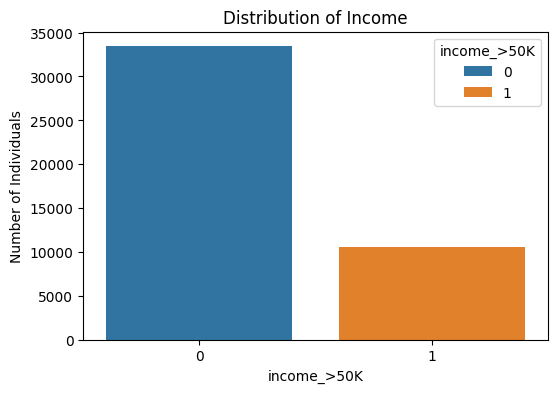

In [117]:
data['income_>50K'].value_counts(normalize=True)
plt.figure(figsize=(6, 4))
sns.countplot(x='income_>50K', hue='income_>50K', data=data)
plt.title('Distribution of Income')
plt.ylabel('Number of Individuals')
plt.show()

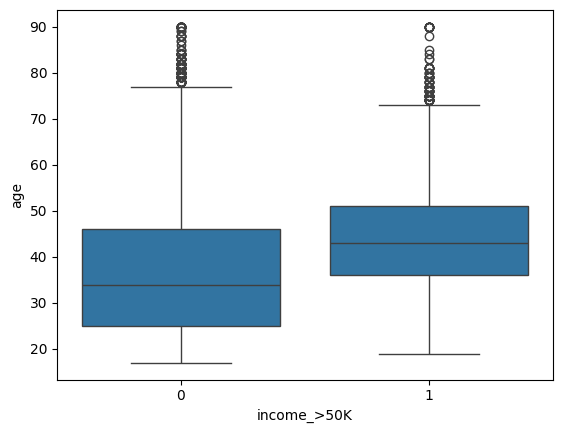

<Axes: xlabel='income_>50K', ylabel='fnlwgt'>

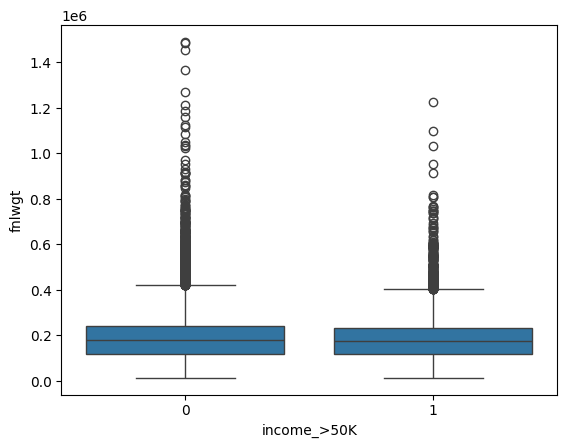

In [118]:
sns.boxplot(data = data, x='income_>50K', y='age')
plt.show()
sns.boxplot(data = data, x='income_>50K', y='fnlwgt')

<Axes: title={'center': 'Distribution of Income by Industry'}, xlabel='workclass', ylabel='Number of Individuals'>

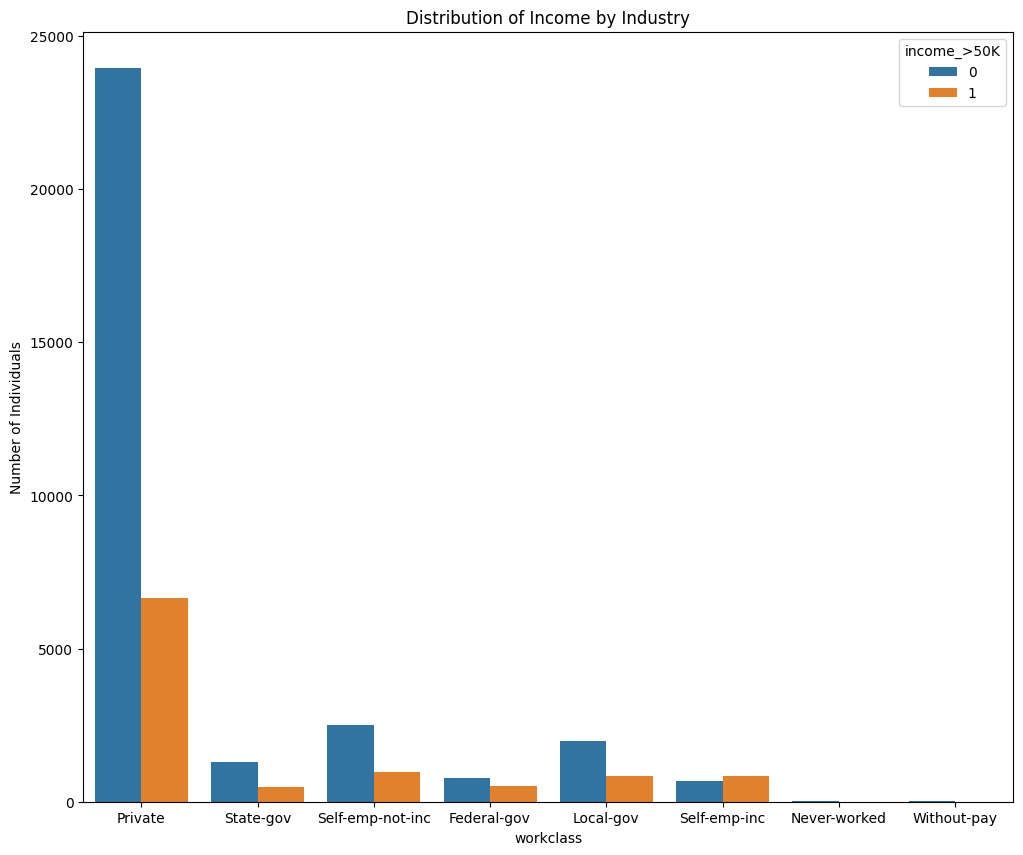

In [119]:
plt.figure(figsize=(12, 10))
plt.title('Distribution of Income by Industry')
plt.ylabel('Number of Individuals')
sns.countplot(x='workclass', hue='income_>50K', data=data)

<Axes: xlabel='race', ylabel='Count'>

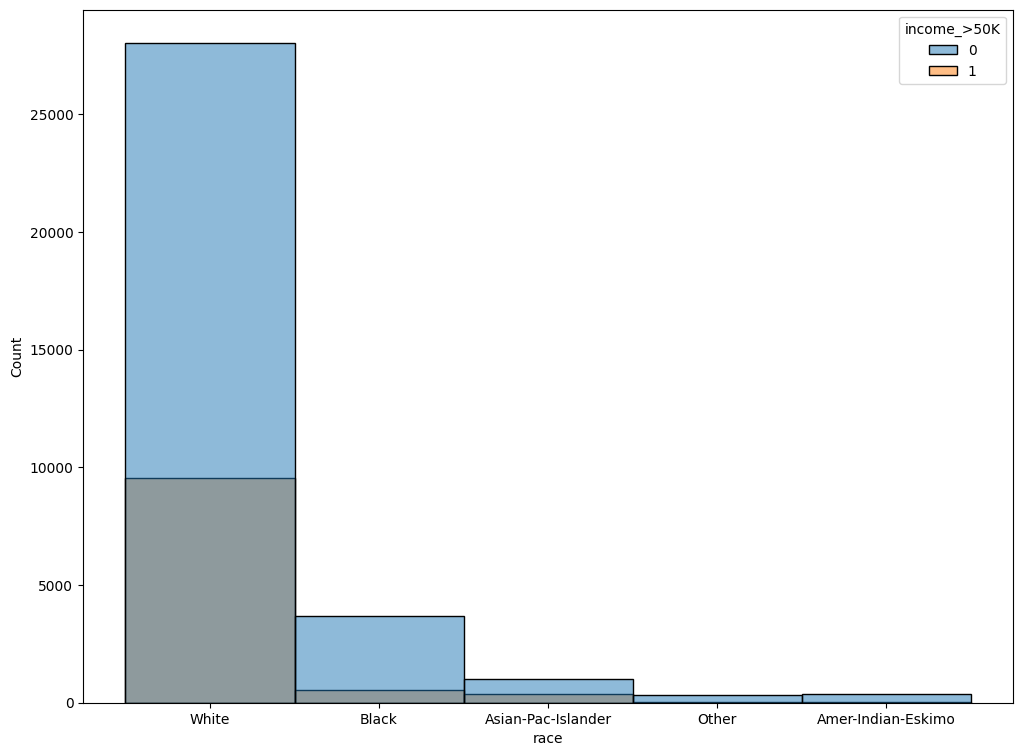

In [120]:
plt.figure(figsize=(12, 9))
sns.histplot(x=data['race'], hue=data['income_>50K'])

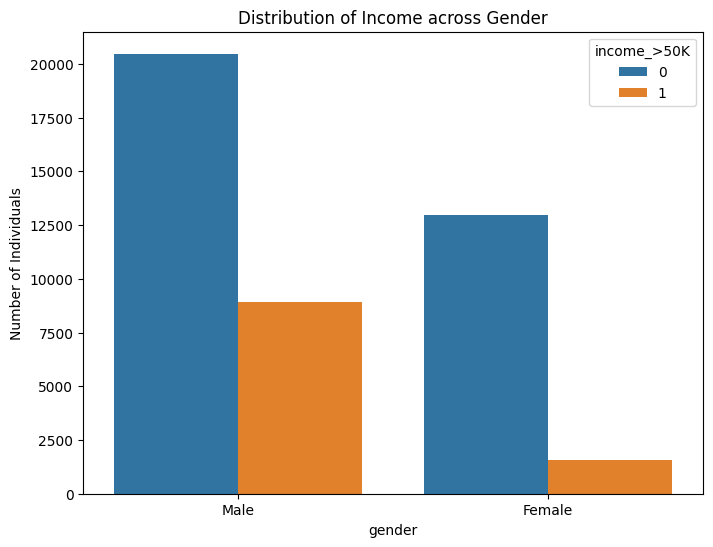

In [121]:
plt.figure(figsize=(8, 6))
sns.countplot(x='gender', hue='income_>50K', data=data)
plt.title('Distribution of Income across Gender')
plt.ylabel('Number of Individuals')
plt.show()

<Axes: xlabel='education', ylabel='count'>

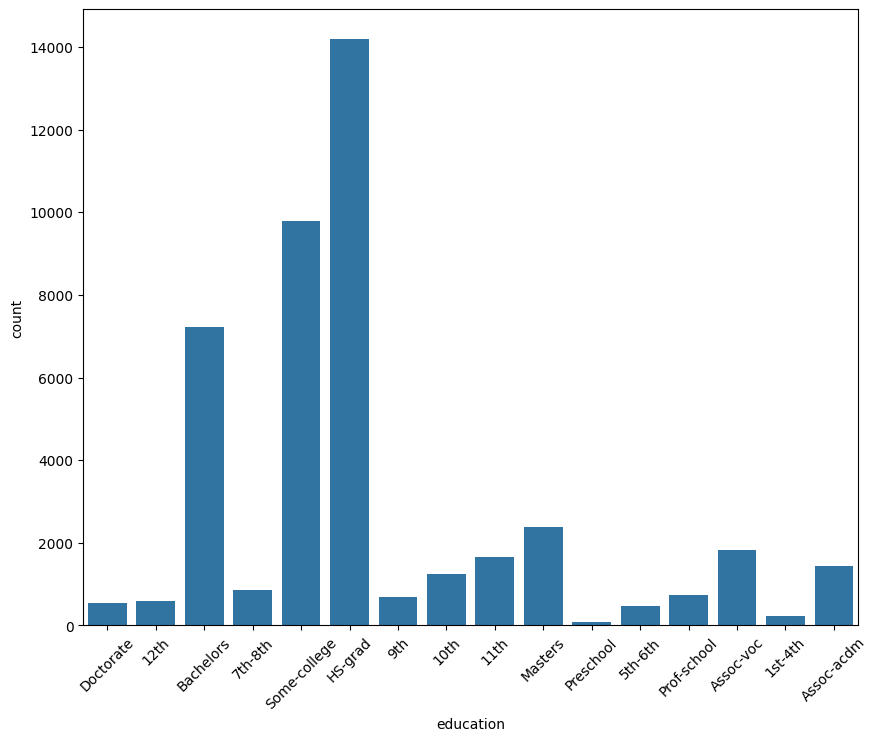

In [122]:
plt.figure(figsize=(10, 8))
plt.xticks(rotation=45)
sns.countplot(data=data, x = 'education')

<Axes: xlabel='occupation', ylabel='count'>

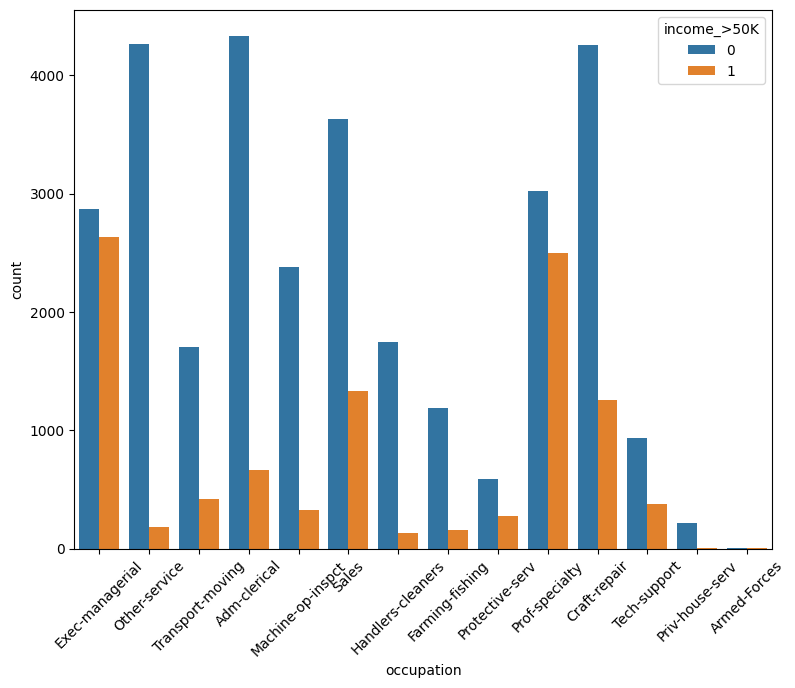

In [123]:
plt.figure(figsize=(9, 7))
plt.xticks(rotation=45)
sns.countplot(x='occupation', hue='income_>50K', data=data)

### visualize data corelation

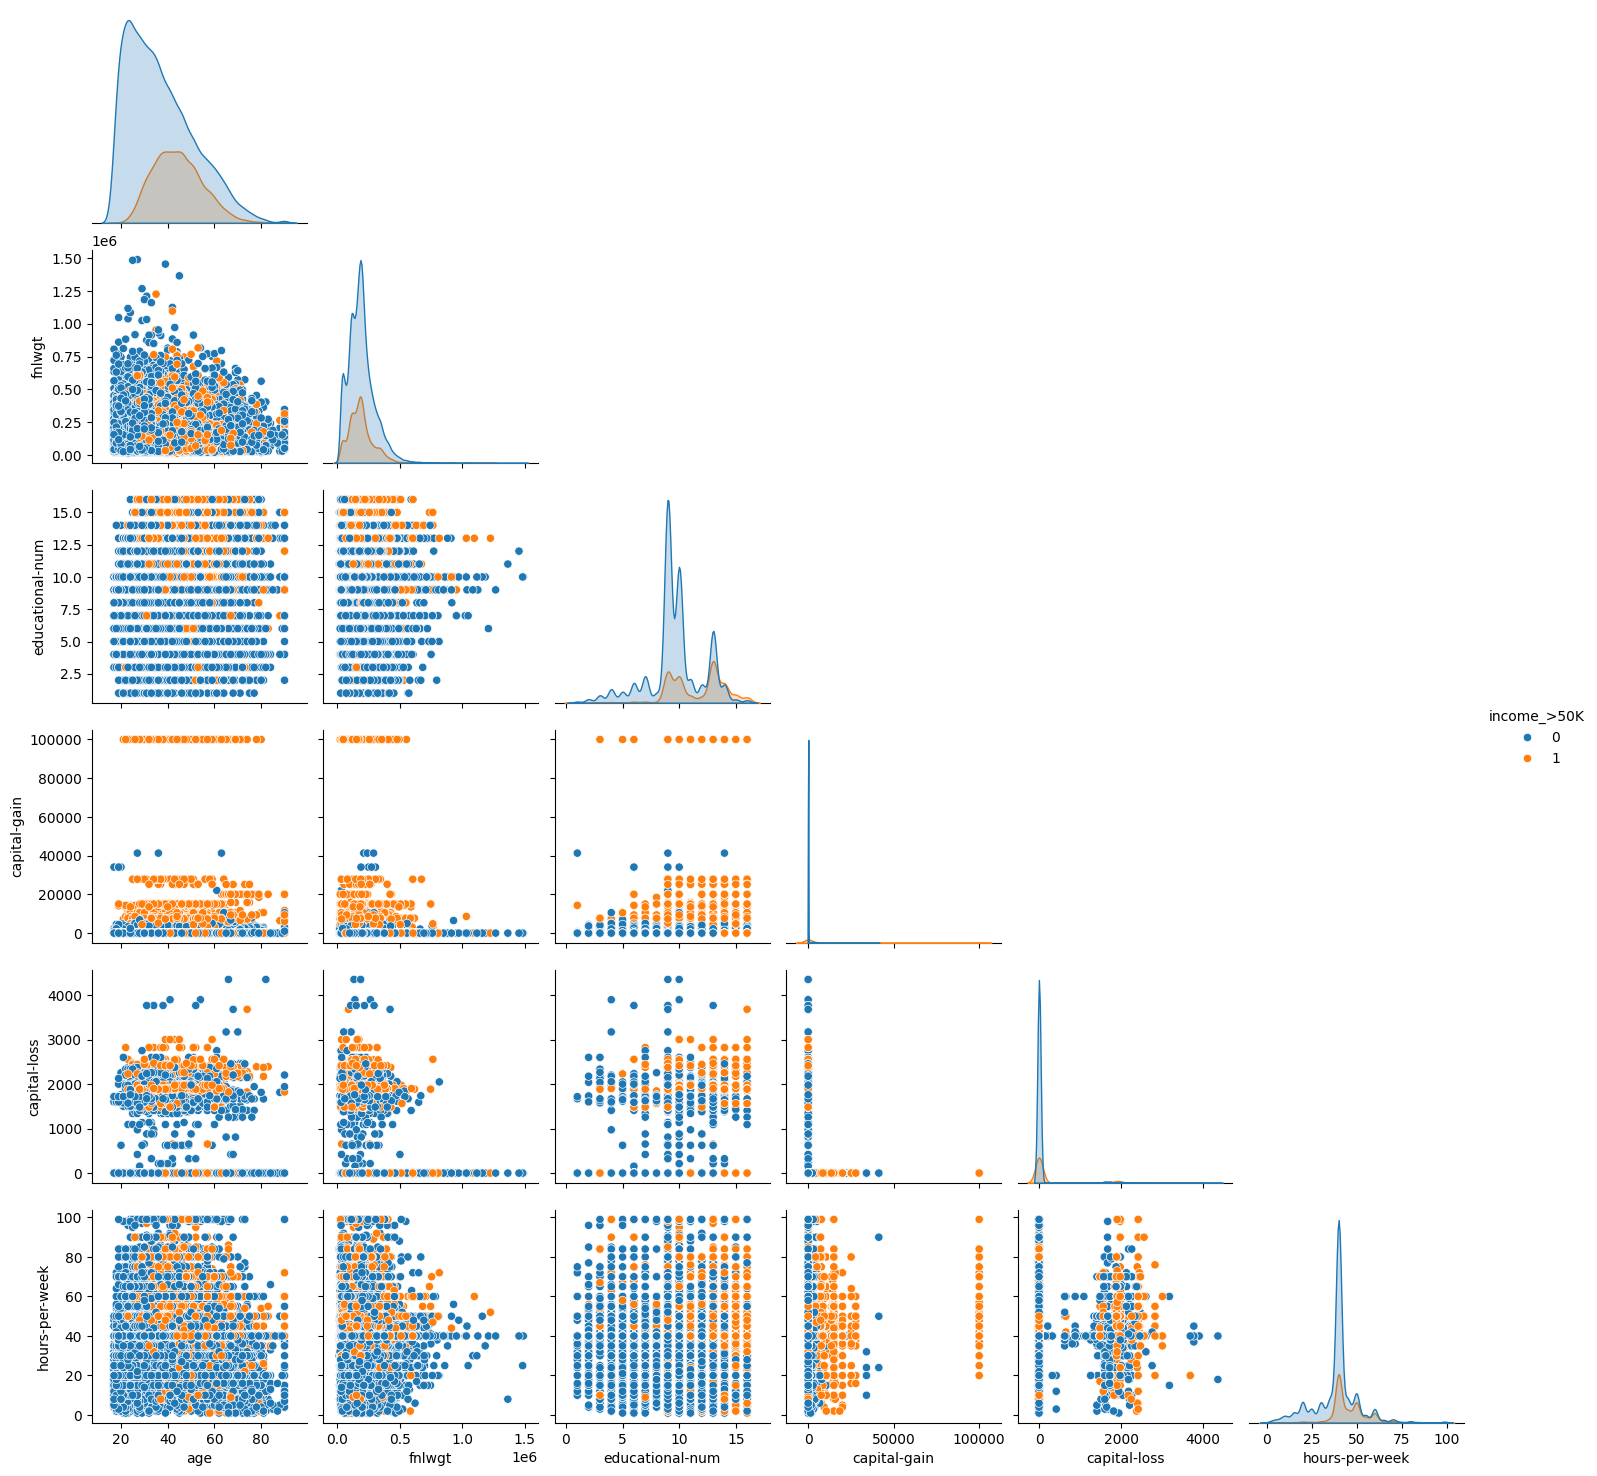

In [124]:
sns.pairplot(data,hue='income_>50K',corner=True)

<Axes: >

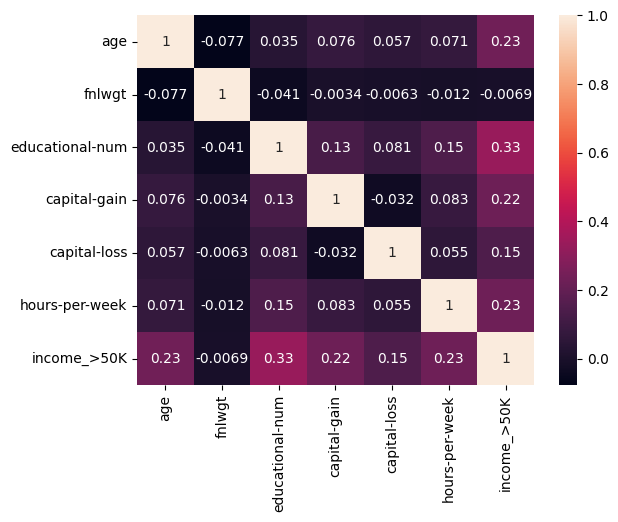

In [125]:
sns.heatmap(data.corr(numeric_only=True), annot = True)

Correlation Matrix:
               Correlation Coefficient
workclass                     0.051141
education                     0.078342
marital-status               -0.198794
occupation                    0.075997
relationship                 -0.253942
race                          0.070024
gender                        0.214496
native-country                0.014391


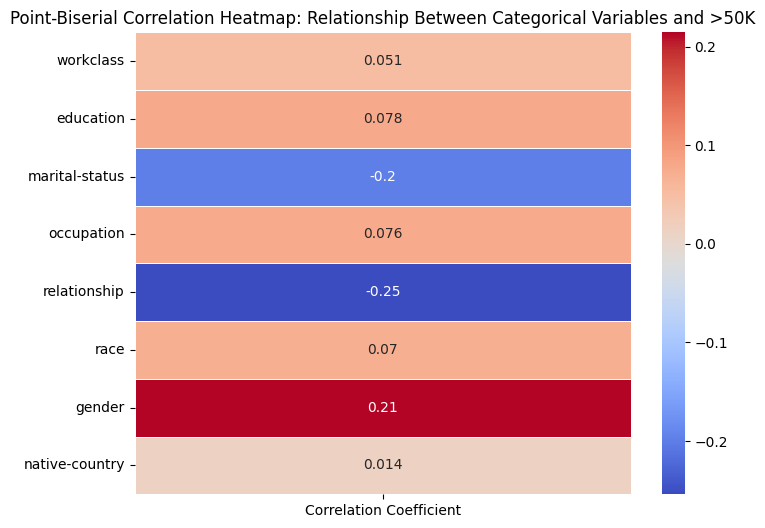

In [126]:
#list columns to drop
from scipy.stats import pointbiserialr
drop_columns = ['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week']

df = pd.DataFrame(data.drop(columns= drop_columns))

# List of categorical variables
categorical_vars = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country']

# Create an empty matrix to store correlation coefficients
correlation_matrix = pd.DataFrame(index=categorical_vars, columns=['Correlation Coefficient'])

# Iterate over categorical variables
for cat_var in categorical_vars:
    # Encode categorical variable if needed
    df[cat_var] = pd.Categorical(df[cat_var]).codes
    
    # Calculate point-biserial correlation coefficient
    correlation_coefficient, _ = pointbiserialr(df[cat_var], df['income_>50K'])
    
    # Store the result in the matrix
    correlation_matrix.loc[cat_var, 'Correlation Coefficient'] = correlation_coefficient

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix.astype(float), annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Point-Biserial Correlation Heatmap: Relationship Between Categorical Variables and >50K')
plt.show()

Native country has the least correlation with the income>_50k, while gender has the strognest correlation with income>_50k

### Data processing

Text(0.5, 1.0, 'Income Distribution: <50k vs. >50k')

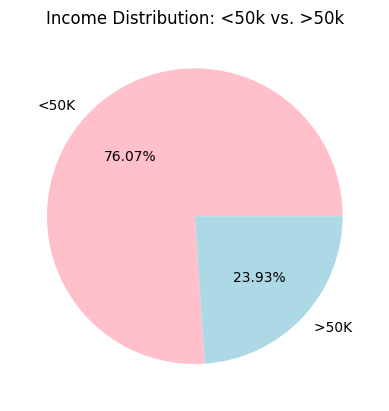

In [127]:
data = pd.read_csv("train.csv")
class_counts = data['income_>50K'].value_counts()
class_labels = ['<50K', '>50K ']
#class_counts.index
plt.pie(class_counts, labels=class_labels, autopct= '%2.2f%%', colors=['pink', 'lightblue'])
data['income_>50K'].value_counts(normalize=True)
plt.title('Income Distribution: <50k vs. >50k')

In [128]:
# get rid of outlier is for fnlwgt is unnecessary it actually lower the model accuracy, 
# but an attempt was made, mention this in report if we don't have enough to write about

# Q1 = data['fnlwgt'].quantile(0.25)
# Q3 = data['fnlwgt'].quantile(0.75)
# IQR = Q3 - Q1
# lower_bound = Q1 - 1.5 * IQR
# upper_bound = Q3 + 1.5 * IQR
# df = data[(data['fnlwgt'] > lower_bound) & (data['fnlwgt'] < upper_bound)]

76% of the data is < 50k, there is a imbalance class problem where we should make the two side of of the sample equal before training

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40],
 [Text(0, 0, 'United-States'),
  Text(1, 0, 'Japan'),
  Text(2, 0, 'South'),
  Text(3, 0, 'Portugal'),
  Text(4, 0, 'Italy'),
  Text(5, 0, 'Mexico'),
  Text(6, 0, 'Ecuador'),
  Text(7, 0, 'England'),
  Text(8, 0, 'Philippines'),
  Text(9, 0, 'China'),
  Text(10, 0, 'Germany'),
  Text(11, 0, 'Dominican-Republic'),
  Text(12, 0, 'Jamaica'),
  Text(13, 0, 'Vietnam'),
  Text(14, 0, 'Thailand'),
  Text(15, 0, 'Puerto-Rico'),
  Text(16, 0, 'Cuba'),
  Text(17, 0, 'India'),
  Text(18, 0, 'Cambodia'),
  Text(19, 0, 'Yugoslavia'),
  Text(20, 0, 'Iran'),
  Text(21, 0, 'El-Salvador'),
  Text(22, 0, 'Poland'),
  Text(23, 0, 'Greece'),
  Text(24, 0, 'Ireland'),
  Text(25, 0, 'Canada'),
  Text(26, 0, 'Guatemala'),
  Text(27, 0, 'Scotland'),
  Text(28, 0, 'Columbia'),


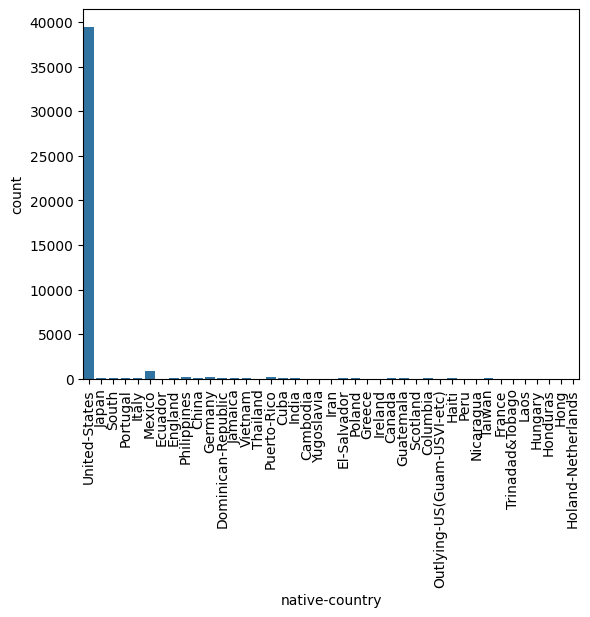

In [129]:
sns.countplot(data=data,x='native-country')
plt.xticks(rotation=90)

The data is mostly in United State, this will make our model more bias towards data within US. In addition, Our previous Point-Biserial heat map also shows that native-country attribute has the lowest among the categorical attributes, it's the safest attribute to drop, and limit our model to predict income within United State

In [130]:
data = data.copy().loc[(data['native-country'] == 'United-States'), :]
#Then we drop the country constrains
data.drop(columns=['native-country'],inplace=True)

One-Hot-encoding the categorical attributes

In [131]:
# data = pd.get_dummies(data, columns = ['education', 'workclass','marital-status', 'occupation', 'relationship', 'race', 'gender'])
# print(data)

columns_to_encode = ['education', 'workclass', 'marital-status', 'occupation', 'relationship', 'race', 'gender']
encoder = OneHotEncoder(sparse=False, drop='first')
encoded_columns = encoder.fit_transform(data[columns_to_encode])

pickle.dump(encoder, open('ohe.pkl','wb'))

encoded_df = pd.DataFrame(encoded_columns, columns=encoder.get_feature_names_out(columns_to_encode))
data.reset_index(drop=True, inplace=True)
encoded_df.reset_index(drop=True, inplace=True)
df_encoded = pd.concat([data.drop(columns=columns_to_encode), encoded_df], axis=1)

Split the x and y and Correcting imbalanced data

In [132]:
# #split x and y
# train, test = train_test_split(data, test_size=0.2, random_state=21)
# x_train, y_train = train.drop(columns=['income_>50K']), train["income_>50K"]
# x_test, y_test = test.drop(columns=['income_>50K']), test["income_>50K"]
# 2
# # using randomoversampler to sove
# from imblearn.under_sampling import RandomUnderSampler
# ros = RandomOverSampler()
# x_train, y_train = ros.fit_resample(x_train, y_train)
# x_test, y_test = ros.fit_resample(x_test,y_test)

ros = RandomOverSampler()
x_ros, y_ros = ros.fit_resample(df_encoded.drop(columns=['income_>50K']), df_encoded['income_>50K'])
x_train, x_test, y_train, y_test = train_test_split(x_ros, y_ros, test_size=0.1, random_state=101)

In [133]:
print(y_train.value_counts(normalize= False)) # counting how much data we are still using
y_train.value_counts(normalize=True)

income_>50K
0    26876
1    26742
Name: count, dtype: int64


income_>50K
0    0.50125
1    0.49875
Name: proportion, dtype: float64

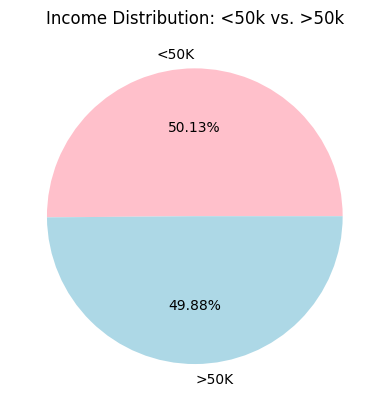

In [134]:
data = [0.50125, 0.49875]

# Labels for the two parts
labels = ['<50K', '>50K']

# Create a pie chart
plt.pie(data, labels=labels, autopct='%2.2f%%', colors=['pink', 'lightblue'])
#plt.pie(class_counts, labels=class_labels, autopct= '%2.2f%%', colors=['pink', 'lightblue'])

# Set the title of the pie chart
plt.title('Income Distribution: <50k vs. >50k')

# Display the pie chart
plt.show()

In [135]:
print(y_train)

22347    0
12491    0
6967     0
28568    0
1055     0
        ..
5695     0
8006     0
17745    0
17931    0
45919    1
Name: income_>50K, Length: 53618, dtype: int64


Rescale beccause the data is distribution is skewed

In [136]:
#scale the data, need to do after encoding
scaler = StandardScaler()
scaled_x_train = scaler.fit_transform(x_train)

# pickle.dump(scaler, open('scaler.pkl','wb'))

# print(x_test)
scaled_x_test = scaler.transform(x_test)
print(scaled_x_test)

[[-0.88345197 -1.04999355  0.54963534 ... -0.06088084 -2.93234368
  -1.63754192]
 [ 0.9508585  -0.45424797  0.95464252 ... -0.06088084  0.34102415
   0.61067139]
 [-1.7241776  -0.07121865 -0.66538621 ... -0.06088084  0.34102415
   0.61067139]
 ...
 [-0.42487435  1.46865977  0.95464252 ... -0.06088084  0.34102415
   0.61067139]
 [-1.26559998  0.26799725 -1.47540057 ... -0.06088084  0.34102415
   0.61067139]
 [ 0.49228088  0.04735678  0.95464252 ... -0.06088084 -2.93234368
   0.61067139]]


### Logistic Regression

In [137]:
logistic = LogisticRegression(max_iter=1000)

logistic.fit(scaled_x_train, y_train)

# pickle.dump(logistic, open('model.pkl','wb'))

pred = logistic.predict(scaled_x_test)

accuracy = accuracy_score(y_test, pred)
class_report = classification_report(y_test, pred)

print("Accuracy:", accuracy)


Accuracy: 0.828633769721383


In [138]:
from sklearn.metrics import mean_squared_error, multilabel_confusion_matrix


print("Accuracy : ", accuracy_score(y_test, pred))
print("Mean Square Error : ", mean_squared_error(y_test, pred))

print(pred[:5])
print("Confusion Matrix for each label : ")
print(multilabel_confusion_matrix(y_test, pred))

print("Classification Report : ")
print(classification_report(y_test, pred))

Accuracy :  0.828633769721383
Mean Square Error :  0.171366230278617
[0 1 0 1 1]
Confusion Matrix for each label : 
[[[2613  433]
  [ 588 2324]]

 [[2324  588]
  [ 433 2613]]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.84      0.80      0.82      2912
           1       0.82      0.86      0.84      3046

    accuracy                           0.83      5958
   macro avg       0.83      0.83      0.83      5958
weighted avg       0.83      0.83      0.83      5958



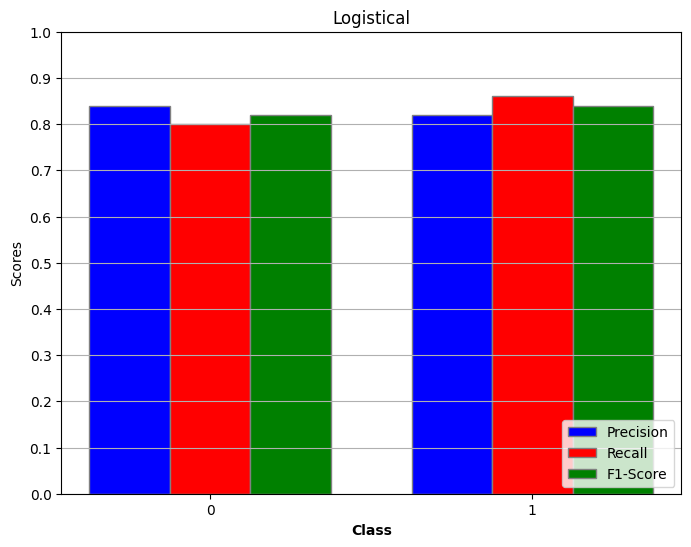

In [152]:
import matplotlib.pyplot as plt
import numpy as np

# Data for the graph
classes = ['0', '1']
precision = [0.84, 0.82]
recall = [0.80, 0.86]
f1_score = [0.82, 0.84 ]

# Creating bar graph
plt.figure(figsize=(8, 6))

# Setting the positions and width for the bars
barWidth = 0.25
r1 = np.arange(len(precision))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

# Creating the bars
plt.bar(r1, precision, color='b', width=barWidth, edgecolor='grey', label='Precision')
plt.bar(r2, recall, color='r', width=barWidth, edgecolor='grey', label='Recall')
plt.bar(r3, f1_score, color='g', width=barWidth, edgecolor='grey', label='F1-Score')

# Adding labels and title
plt.xlabel('Class', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(precision))], classes)
plt.ylabel('Scores')
plt.title('Logistical')

# Creating a legend
plt.legend()

# Set Y-axis limits and ticks for more precision
plt.ylim(0, 1)  # Assuming your scores range from 0 to 1
plt.yticks([i/10.0 for i in range(0, 11)])  # This creates ticks at every 0.1 interval
plt.grid(axis='y')
plt.legend(loc='lower right', bbox_to_anchor=(1, 0))
# Display the graph
plt.show()


### Neural Network

If neural network is using minmax sclaer, it's more susptible towards outliers, should manually remove outlier

In [96]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler

#df = pd.get_dummies(originalData, columns = ['education', 'workclass','educational-num','marital-status', 'occupation', 'relationship', 'race', 'gender','native-country'])
#X = df.drop("income_>50K",axis=1)

scaler = MinMaxScaler(feature_range=(0, 1))
X_rescaled_nn = scaler.fit_transform(x_train)
X_nn = pd.DataFrame(data = X_rescaled_nn, columns = x_train.columns)
y_nn = pd.get_dummies(y_train)

data_train, data_test, class_train, class_test = train_test_split(X_nn, y_nn, test_size=0.1)
mlp = MLPClassifier(solver = 'sgd', random_state = 42, activation = 'logistic', learning_rate_init = 0.3, batch_size = 100, hidden_layer_sizes = (12, 3), max_iter = 500)

mlp.fit(data_train, class_train)

pred = mlp.predict(data_test)
pred

array([[0, 1],
       [1, 0],
       [0, 1],
       ...,
       [0, 1],
       [1, 0],
       [0, 1]])

In [97]:
from sklearn.metrics import classification_report, confusion_matrix, multilabel_confusion_matrix
from sklearn.metrics import mean_squared_error, accuracy_score, precision_score, recall_score

print("Accuracy : ", accuracy_score(class_test, pred))
print("Mean Square Error : ", mean_squared_error(class_test, pred))

print(pred[:5])
print("Confusion Matrix for each label : ")
print(multilabel_confusion_matrix(class_test, pred))

print("Classification Report : ")
print(classification_report(class_test, pred))

Accuracy :  0.8336441626258858
Mean Square Error :  0.16635583737411413
[[0 1]
 [1 0]
 [0 1]
 [1 0]
 [0 1]]
Confusion Matrix for each label : 
[[[2268  362]
  [ 530 2202]]

 [[2202  530]
  [ 362 2268]]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.86      0.81      0.83      2732
           1       0.81      0.86      0.84      2630

   micro avg       0.83      0.83      0.83      5362
   macro avg       0.83      0.83      0.83      5362
weighted avg       0.84      0.83      0.83      5362
 samples avg       0.83      0.83      0.83      5362



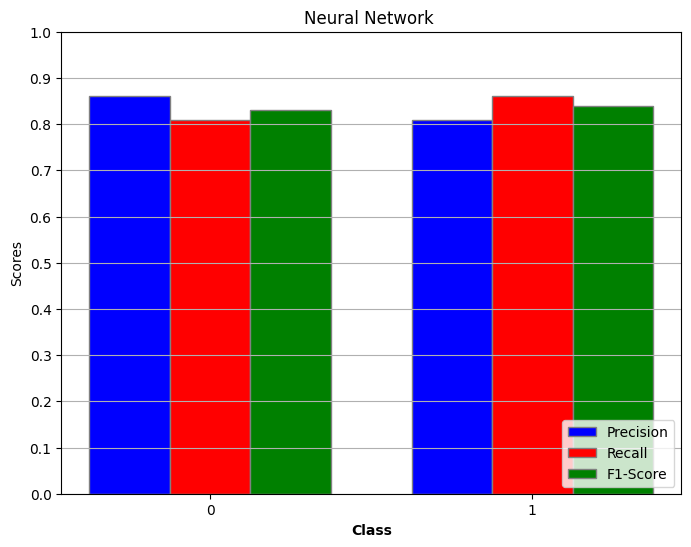

In [153]:
import matplotlib.pyplot as plt
import numpy as np

# Data for the graph
classes = ['0', '1']
precision = [0.86, 0.81]
recall = [0.81, 0.86]
f1_score = [0.83, 0.84 ]

# Creating bar graph
plt.figure(figsize=(8, 6))

# Setting the positions and width for the bars
barWidth = 0.25
r1 = np.arange(len(precision))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

# Creating the bars
plt.bar(r1, precision, color='b', width=barWidth, edgecolor='grey', label='Precision')
plt.bar(r2, recall, color='r', width=barWidth, edgecolor='grey', label='Recall')
plt.bar(r3, f1_score, color='g', width=barWidth, edgecolor='grey', label='F1-Score')

# Adding labels and title
plt.xlabel('Class', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(precision))], classes)
plt.ylabel('Scores')
plt.title('Neural Network ')

# Creating a legend
plt.legend()

# Set Y-axis limits and ticks for more precision
plt.ylim(0, 1)  # Assuming your scores range from 0 to 1
plt.yticks([i/10.0 for i in range(0, 11)])  # This creates ticks at every 0.1 interval
plt.grid(axis='y')
plt.legend(loc='lower right', bbox_to_anchor=(1, 0))
# Display the graph
plt.show()


### Hyperparameter Tuning for Neural Network

In [ ]:
max_iterations = [500,800,1000]
hidden_layer_siz = [(6, 8), (9, 13), (13, 11)]
learning_rates = 0.15 * np.arange(1, 3)

param_grid = dict(learning_rate_init = learning_rates, hidden_layer_sizes = hidden_layer_siz, max_iter = max_iterations)

grid = GridSearchCV(estimator = mlp, param_grid = param_grid)
grid.fit(X_nn, y_nn)

GridSearchCV(estimator=MLPClassifier(activation='logistic', batch_size=100,
                                     hidden_layer_sizes=(12, 3),
                                     learning_rate_init=0.3, max_iter=500,
                                     random_state=42, solver='sgd'),
             param_grid={'hidden_layer_sizes': [(6, 8), (9, 13), (13, 11)],
                         'learning_rate_init': array([0.15, 0.3 ]),
                         'max_iter': [500, 800, 1000]})

In [ ]:
print("Optimal Hyper-parameters : ", grid.best_params_)
print("Optimal Accuracy : ", grid.best_score_)
# Tuning had a minimal effect on increasing accuracy

Optimal Hyper-parameters :  {'hidden_layer_sizes': (13, 11), 'learning_rate_init': 0.3, 'max_iter': 500}
Optimal Accuracy :  0.831430969366345


### Random Forest

In [102]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
# The result using the standardscaler is actually less accurate than by 0.001-0.002

cv_kfold = KFold(n_splits = 10, shuffle = False,)

# hyperparameter
estimators = [100, 150, 300]
features = [3, 5, 7, 14, 20]
method = ["gini", "entropy"] # criterion
parameter = dict(n_estimators = estimators, criterion = method, max_features = features)

model = RandomForestClassifier()
grid_RF = GridSearchCV(estimator=model, param_grid=parameter, scoring='accuracy', cv=cv_kfold)
# RFC = RandomForestClassifier(criterion = "gini",n_estimators=150, max_features=5)  
# RFC.fit(x_train, y_train) 
#we are not using the standard scaled data, see 'How we increae model accuracy notebook for explaination'
grid_RF.fit(x_train,y_train)


GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': [3, 5, 7, 14, 20],
                         'n_estimators': [100, 150, 300]},
             scoring='accuracy')

In [103]:
best_RF_params = grid_RF.best_params_
print("Optimal Hyper-parameters : ", grid_RF.best_params_)
print("Optimal Accuracy(averaged from all k-fold) : ",grid_RF.best_score_)
best_RF_model = grid_RF.best_estimator_
pred2 = best_RF_model.predict(x_test)
accuracy = accuracy_score(y_test, pred2)
print("accuracy on the same test data as other model: ", accuracy)

Optimal Hyper-parameters :  {'criterion': 'gini', 'max_features': 20, 'n_estimators': 100}
Optimal Accuracy(averaged from all k-fold) :  0.9307135624752269
accuracy on the same test data as other model:  0.9384021483719369


In [104]:
pickle.dump(best_RF_model, open('RF_model.pkl','wb'))

In [105]:
print("Mean Square Error : ", mean_squared_error(y_test, pred2))

print(pred[:5])
print("Confusion Matrix for each label : ")
print(multilabel_confusion_matrix(y_test, pred2))

print("Classification Report : ")
print(classification_report(y_test, pred2))

Mean Square Error :  0.06159785162806311
[[0 1]
 [1 0]
 [0 1]
 [1 0]
 [1 0]]
Confusion Matrix for each label : 
[[[3003   43]
  [ 324 2588]]

 [[2588  324]
  [  43 3003]]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.98      0.89      0.93      2912
           1       0.90      0.99      0.94      3046

    accuracy                           0.94      5958
   macro avg       0.94      0.94      0.94      5958
weighted avg       0.94      0.94      0.94      5958



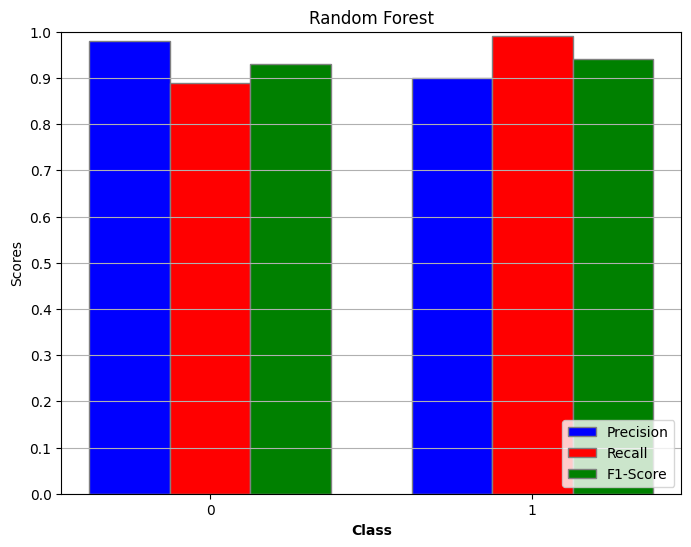

In [146]:
import matplotlib.pyplot as plt
import numpy as np

# Data for the graph
classes = ['0', '1']
precision = [0.98, 0.90]
recall = [0.89, 0.99]
f1_score = [0.93, 0.94]

# Creating bar graph
plt.figure(figsize=(8, 6))

# Setting the positions and width for the bars
barWidth = 0.25
r1 = np.arange(len(precision))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

# Creating the bars
plt.bar(r1, precision, color='b', width=barWidth, edgecolor='grey', label='Precision')
plt.bar(r2, recall, color='r', width=barWidth, edgecolor='grey', label='Recall')
plt.bar(r3, f1_score, color='g', width=barWidth, edgecolor='grey', label='F1-Score')

# Adding labels and title
plt.xlabel('Class', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(precision))], classes)
plt.ylabel('Scores')
plt.title('Random Forest')

# Creating a legend
plt.legend()

# Set Y-axis limits and ticks for more precision
plt.ylim(0, 1)  # Assuming your scores range from 0 to 1
plt.yticks([i/10.0 for i in range(0, 11)])  # This creates ticks at every 0.1 interval
plt.grid(axis='y')
plt.legend(loc='lower right', bbox_to_anchor=(1, 0))
# Display the graph
plt.show()


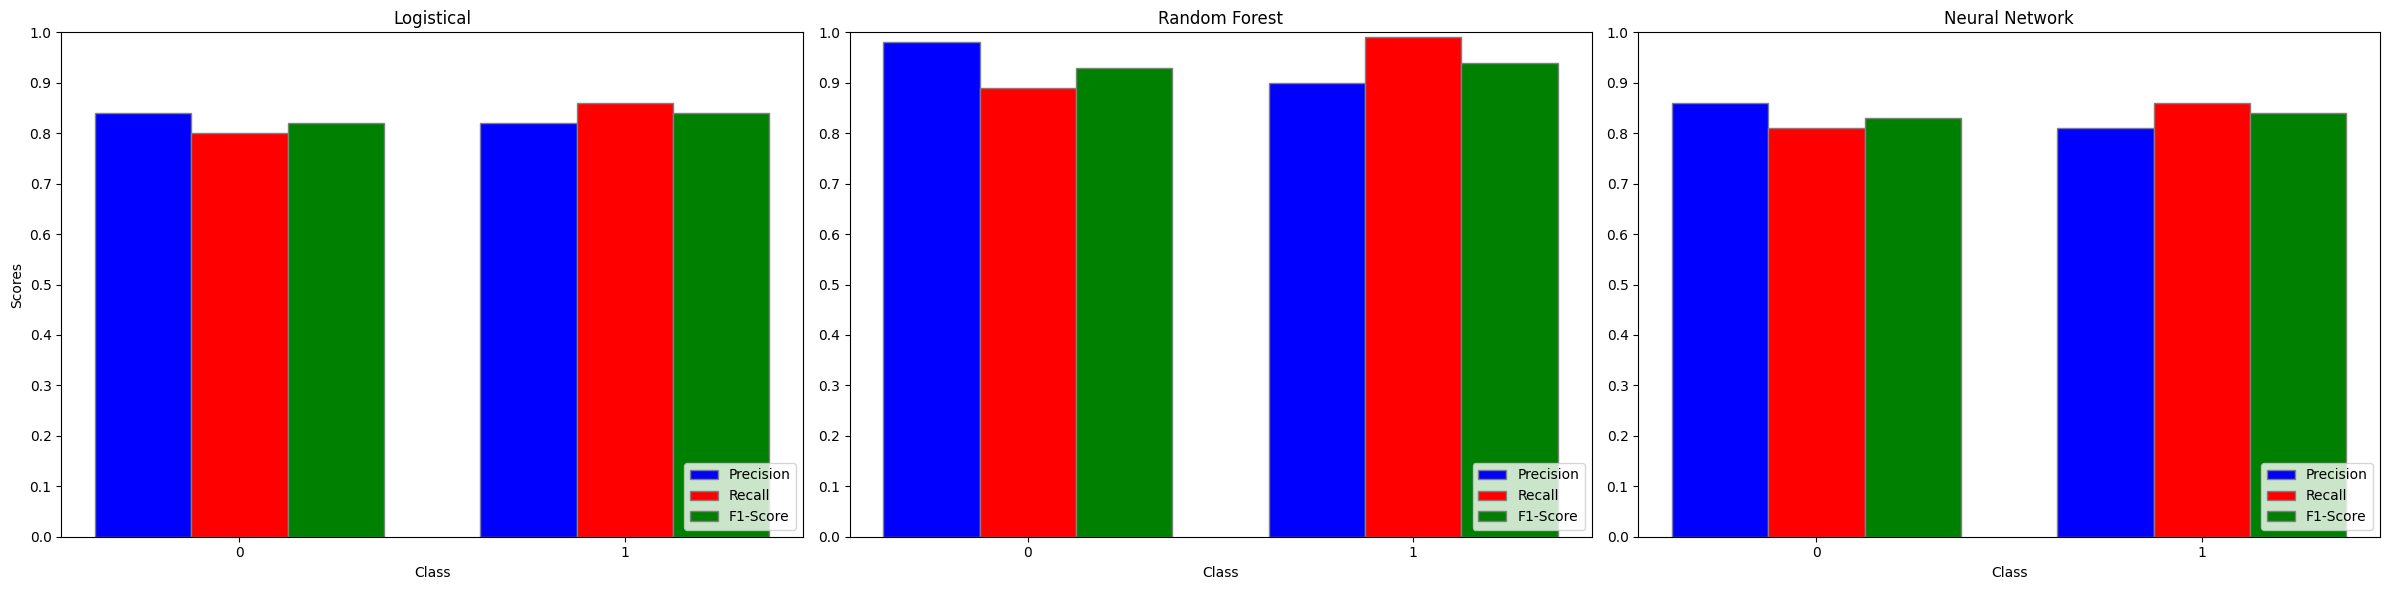

In [159]:
import matplotlib.pyplot as plt
import numpy as np

# Data for Model 1 (Logistical)
precision_l = [0.84, 0.82]
recall_l = [0.80, 0.86]
f1_score_l = [0.82, 0.84]

# Data for Model 2 (Random Forest)
precision_nn = [0.86, 0.81]
recall_nn = [0.81, 0.86]
f1_score_nn = [0.83, 0.84]

# Data for Model 3 (Neural Network)
precision_rf = [0.98, 0.90]
recall_rf = [0.89, 0.99]
f1_score_rf = [0.93, 0.94]

# Creating bar graph
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(24, 6))

# Setting the positions and width for the bars
barWidth = 0.25
r = np.arange(len(['0', '1']))

# Plot for Model 1 (Logistical)
axes[0].bar(r, precision_l, color='b', width=barWidth, edgecolor='grey', label='Precision')
axes[0].bar(r + barWidth, recall_l, color='r', width=barWidth, edgecolor='grey', label='Recall')
axes[0].bar(r + 2*barWidth, f1_score_l, color='g', width=barWidth, edgecolor='grey', label='F1-Score')
axes[0].set_title('Logistical')
axes[0].set_xlabel('Class')
axes[0].set_ylabel('Scores')
axes[0].set_xticks(r + barWidth)
axes[0].set_xticklabels(['0', '1'])
axes[0].set_ylim(0, 1)
axes[0].set_yticks([i/10.0 for i in range(0, 11)])
axes[0].legend(loc='lower right')

# Plot for Model 2 (Random Forest)
axes[1].bar(r, precision_rf, color='b', width=barWidth, edgecolor='grey', label='Precision')
axes[1].bar(r + barWidth, recall_rf, color='r', width=barWidth, edgecolor='grey', label='Recall')
axes[1].bar(r + 2*barWidth, f1_score_rf, color='g', width=barWidth, edgecolor='grey', label='F1-Score')
axes[1].set_title('Random Forest')
axes[1].set_xlabel('Class')
axes[1].set_xticks(r + barWidth)
axes[1].set_xticklabels(['0', '1'])
axes[1].set_ylim(0, 1)
axes[1].set_yticks([i/10.0 for i in range(0, 11)])
axes[1].legend(loc='lower right')
plt.grid(axis='y')

# Plot for Model 3 (Neural Network)
axes[2].bar(r, precision_nn, color='b', width=barWidth, edgecolor='grey', label='Precision')
axes[2].bar(r + barWidth, recall_nn, color='r', width=barWidth, edgecolor='grey', label='Recall')
axes[2].bar(r + 2*barWidth, f1_score_nn, color='g', width=barWidth, edgecolor='grey', label='F1-Score')
axes[2].set_title('Neural Network')
axes[2].set_xlabel('Class')
axes[2].set_xticks(r + barWidth)
axes[2].set_xticklabels(['0', '1'])
axes[2].set_ylim(0, 1)
axes[2].set_yticks([i/10.0 for i in range(0, 11)])
axes[2].legend(loc='lower right')

# Display the graph
plt.tight_layout()
plt.grid(axis='y')
plt.show()


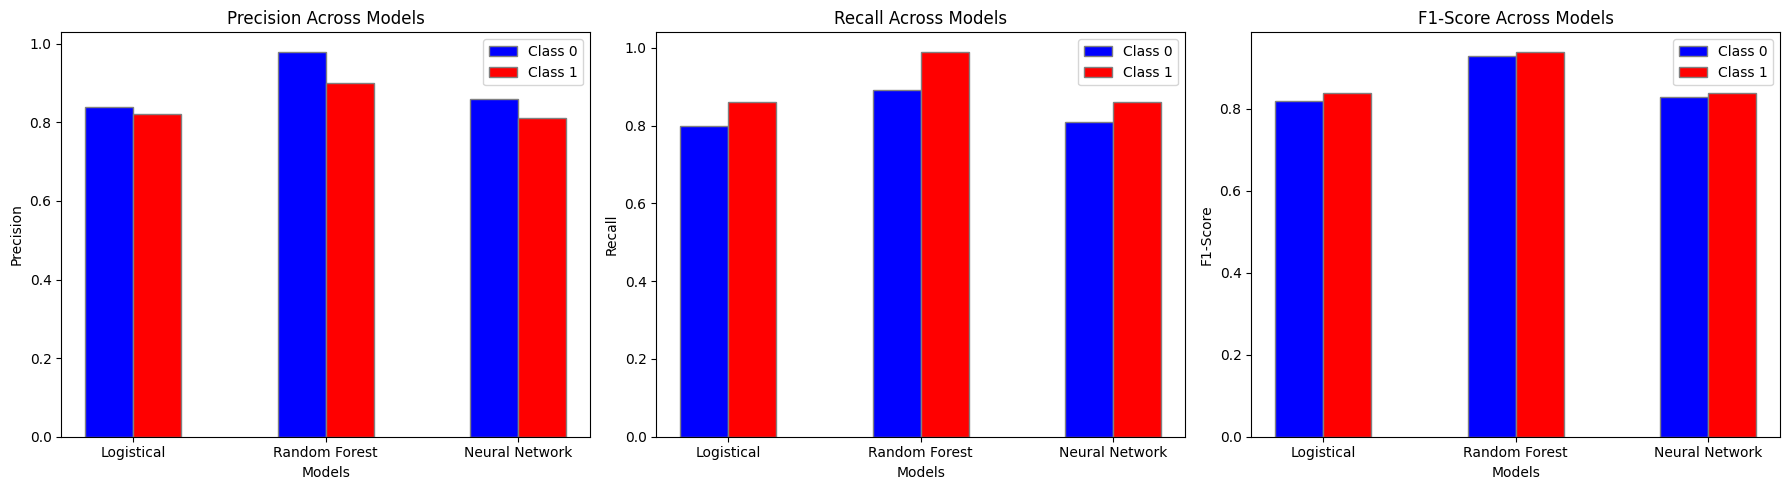

In [160]:
import matplotlib.pyplot as plt
import numpy as np

# Data for the models
precision_l = [0.84, 0.82]
recall_l = [0.80, 0.86]
f1_score_l = [0.82, 0.84]

precision_nn = [0.86, 0.81]
recall_nn = [0.81, 0.86]
f1_score_nn = [0.83, 0.84]

precision_rf = [0.98, 0.90]
recall_rf = [0.89, 0.99]
f1_score_rf = [0.93, 0.94]

# Setting up the plot
n_models = len(['Logistical', 'Random Forest', 'Neural Network'])
barWidth = 0.25
r = np.arange(n_models)

# Creating figures for each metric
plt.figure(figsize=(18, 5))

# Precision plot
plt.subplot(1, 3, 1)
plt.bar(r, [precision_l[0], precision_rf[0], precision_nn[0]], color='b', width=barWidth, edgecolor='grey', label='Class 0')
plt.bar(r + barWidth, [precision_l[1], precision_rf[1], precision_nn[1]], color='r', width=barWidth, edgecolor='grey', label='Class 1')
plt.xlabel('Models')
plt.ylabel('Precision')
plt.title('Precision Across Models')
plt.xticks(r + barWidth / 2, ['Logistical', 'Random Forest', 'Neural Network'])
plt.legend()

# Recall plot
plt.subplot(1, 3, 2)
plt.bar(r, [recall_l[0], recall_rf[0], recall_nn[0]], color='b', width=barWidth, edgecolor='grey', label='Class 0')
plt.bar(r + barWidth, [recall_l[1], recall_rf[1], recall_nn[1]], color='r', width=barWidth, edgecolor='grey', label='Class 1')
plt.xlabel('Models')
plt.ylabel('Recall')
plt.title('Recall Across Models')
plt.xticks(r + barWidth / 2, ['Logistical', 'Random Forest', 'Neural Network'])
plt.legend()

# F1-Score plot
plt.subplot(1, 3, 3)
plt.bar(r, [f1_score_l[0], f1_score_rf[0], f1_score_nn[0]], color='b', width=barWidth, edgecolor='grey', label='Class 0')
plt.bar(r + barWidth, [f1_score_l[1], f1_score_rf[1], f1_score_nn[1]], color='r', width=barWidth, edgecolor='grey', label='Class 1')
plt.xlabel('Models')
plt.ylabel('F1-Score')
plt.title('F1-Score Across Models')
plt.xticks(r + barWidth / 2, ['Logistical', 'Random Forest', 'Neural Network'])
plt.legend()

# Adjust layout and show plot
plt.tight_layout()
plt.show()


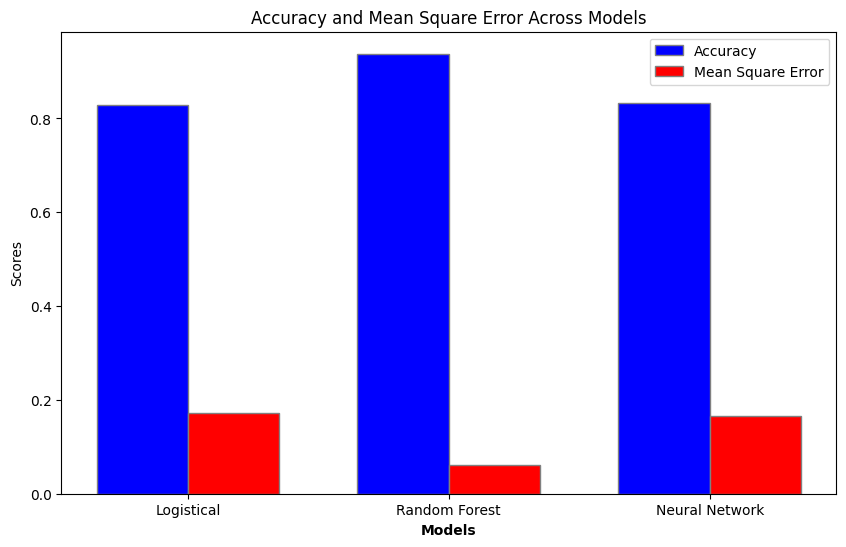

In [161]:
import matplotlib.pyplot as plt
import numpy as np


# Data for accuracy and mean square error for three models
models = ['Logistical', 'Random Forest', 'Neural Network']
accuracy = [0.828, 0.938, 0.83364]  # Example accuracies for the three models
mse = [0.172, 0.06159, 0.16635]  # Example mean square errors for the three models

# Setting up the plot
n_models = len(models)
barWidth = 0.35
r = np.arange(n_models)

# Creating the bar graph
plt.figure(figsize=(10, 6))

# Adding Accuracy bars
plt.bar(r, accuracy, color='b', width=barWidth, edgecolor='grey', label='Accuracy')

# Adding MSE bars
plt.bar(r + barWidth, mse, color='r', width=barWidth, edgecolor='grey', label='Mean Square Error')

# Adding labels and title
plt.xlabel('Models', fontweight='bold')
plt.ylabel('Scores')
plt.title('Accuracy and Mean Square Error Across Models')
plt.xticks(r + barWidth / 2, models)
plt.legend()

# Show plot
plt.show()

